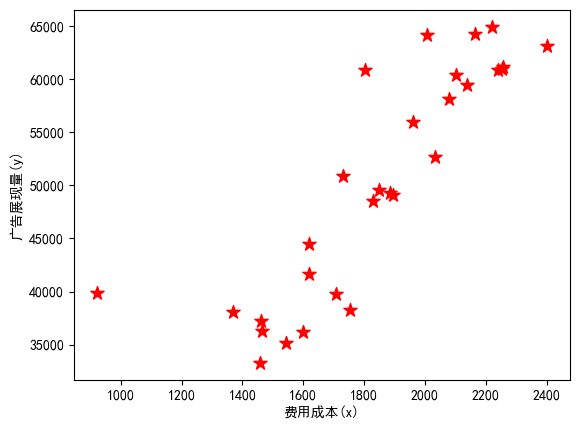

,费用,展现量,点击量,订单金额,加购数,下单新客数,访问页面数,进店数,商品关注数
费用,1.000000,0.856013,0.858597,0.625787,0.601735,0.642448,0.763320,0.650899,0.155748
展现量,0.856013,1.000000,0.938554,0.728037,0.751283,0.756107,0.847017,0.697591,0.209990
点击量,0.858597,0.938554,1.000000,0.854883,0.815858,0.863694,0.910142,0.585917,0.205446
订单金额,0.625787,0.728037,0.854883,1.000000,0.813694,0.947238,0.803193,0.465630,0.279830
加购数,0.601735,0.751283,0.815858,0.813694,1.000000,0.809087,0.776379,0.471594,0.312882
下单新客数,0.642448,0.756107,0.863694,0.947238,0.809087,1.000000,0.842903,0.485570,0.361718
访问页面数,0.763320,0.847017,0.910142,0.803193,0.776379,0.842903,1.000000,0.541397,0.327500
进店数,0.650899,0.697591,0.585917,0.465630,0.471594,0.485570,0.541397,1.000000,0.393864
商品关注数,0.155748,0.209990,0.205446,0.279830,0.312882,0.361718,0.327500,0.393864,1.000000


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']

# 输出列名不对齐
pd.set_option('display.unicode.east_asian_width', True)

# 设置数据显示的列数和宽度
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 读取数据
df_y = pd.read_excel('展现量.xlsx')
df_x = pd.read_excel('费用.xlsx')


# 将日期转化为datetime类型
df_x['日期'] = pd.to_datetime(df_x['日期'])
df_y['日期'] = pd.to_datetime(df_y['日期'])

# 将日期设置为索引
df_x = df_x.set_index('日期')
df_y = df_y.set_index('日期')


# 按天统计费用
# 重采样按天来
df_x = df_x.resample('D').sum()

# 数据合并
data = pd.merge(df_x, df_y, on='日期')

plt.xlabel('费用成本(x)')
plt.ylabel('广告展现量(y)')

# 绘制散点图，以“费用”和“展现量”作为横坐标轴
plt.scatter(data['费用'], data['展现量'], s=100, c='r', marker='*')

plt.show()

# 相关系数
data.corr()

散点图呈现出线性关系，并且相关系数在0.85以上代表相关性很强